In [ ]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt  # Corrected import statement
import seaborn as sns

In [ ]:
path = "water_potability.csv"
df1 = pd.read_csv(path)
df = X = df1[['Turbidity', 'ph','Potability']]
df.head()

,Turbidity,ph,Potability
0,2.963135,NaN,0
1,4.500656,3.716080,0
2,3.055934,8.099124,0
3,4.628771,8.316766,0
4,4.075075,9.092223,0


In [ ]:
df.shape


(3276, 3)

In [ ]:
df.isnull().sum()

Turbidity       0
ph            491
Potability      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Turbidity   3276 non-null   float64
 1   ph          2785 non-null   float64
 2   Potability  3276 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 76.9 KB


In [ ]:
df.describe()

,Turbidity,ph,Potability
count,3276.000000,2785.000000,3276.000000
mean,3.966786,7.080795,0.390110
std,0.780382,1.594320,0.487849
min,1.450000,0.000000,0.000000
25%,3.439711,6.093092,0.000000
50%,3.955028,7.036752,0.000000
75%,4.500320,8.062066,1.000000
max,6.739000,14.000000,1.000000


In [ ]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

<ipython-input-9-922ffc95d673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(),inplace=True)


Turbidity     0
ph            0
Potability    0
dtype: int64

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

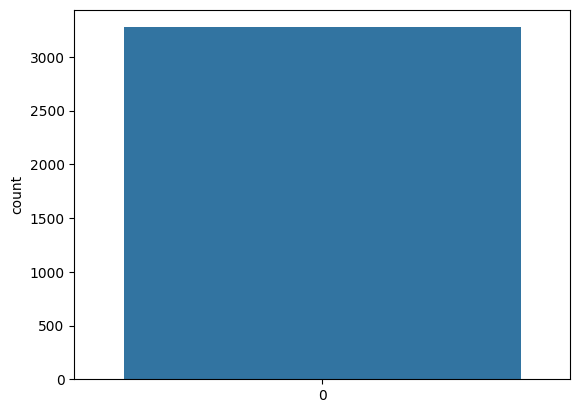

In [ ]:
sns.countplot(df['Potability'])
plt.show()

<ipython-input-12-48fab1294798>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'])


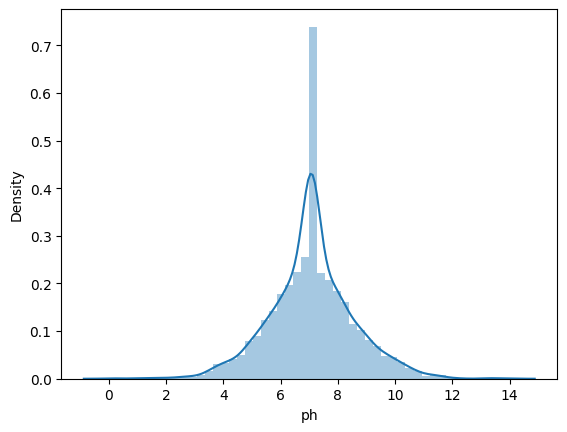

In [ ]:
sns.distplot(df['ph'])
plt.show()

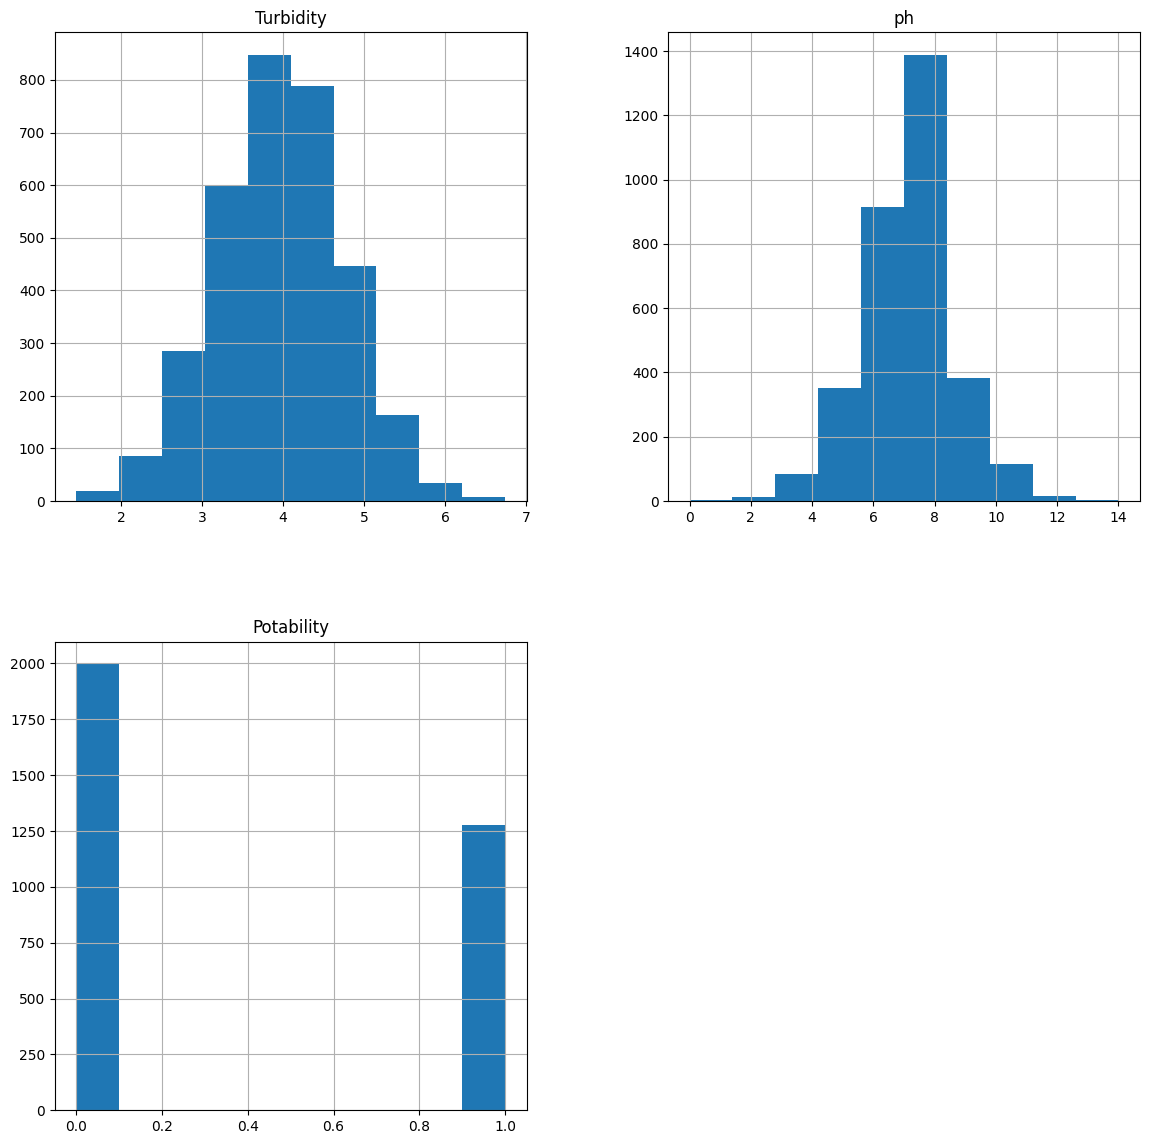

In [ ]:
df.hist(figsize=(14,14))
plt.show()

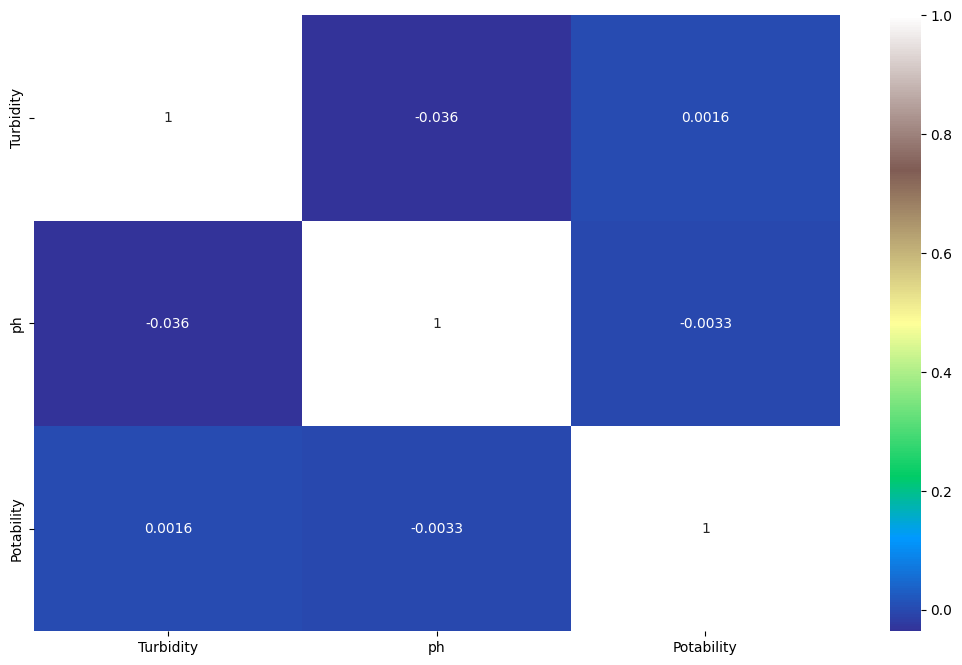

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

<Axes: >

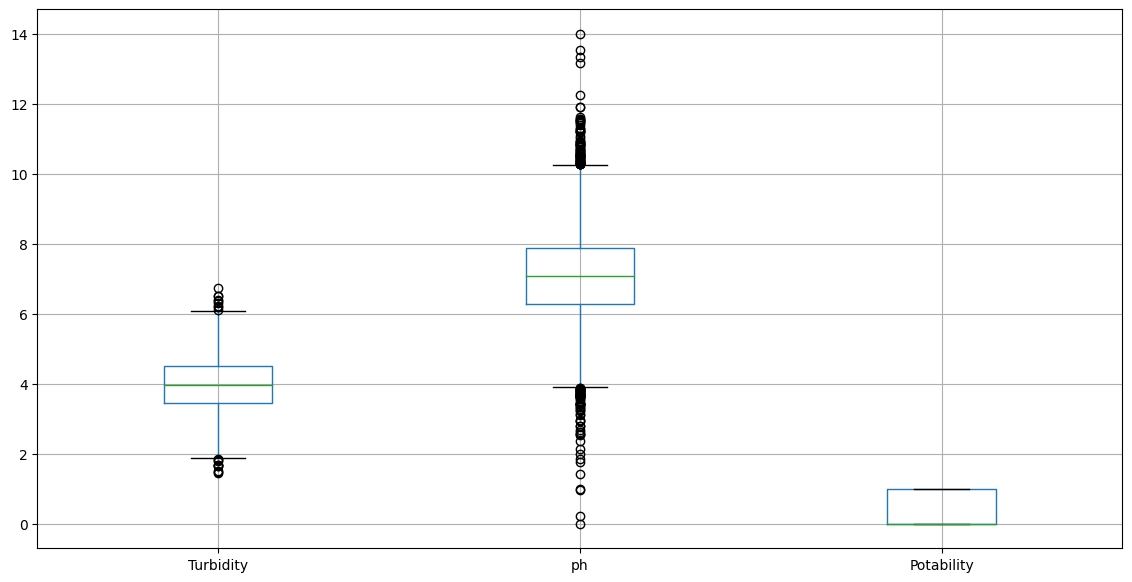

In [ ]:
df.boxplot(figsize=(14,7))

In [ ]:
X = df[['Turbidity', 'ph']]
Y = df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=101, shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=10,splitter='best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Accuracy Score = 54.57317073170732
Confusion Matrix =
 [[258 144]
 [154 100]]
Classification Report =
               precision    recall  f1-score   support

           0       0.63      0.64      0.63       402
           1       0.41      0.39      0.40       254

    accuracy                           0.55       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.54      0.55      0.54       656



In [ ]:
ans = dt.predict([[5.735724,4.732954]])[0]
ans

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)


|--- ph <= 4.65
|   |--- Turbidity <= 5.13
|   |   |--- Turbidity <= 2.11
|   |   |   |--- class: 1
|   |   |--- Turbidity >  2.11
|   |   |   |--- Turbidity <= 3.99
|   |   |   |   |--- Turbidity <= 2.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Turbidity >  2.80
|   |   |   |   |   |--- Turbidity <= 3.11
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Turbidity >  3.11
|   |   |   |   |   |   |--- Turbidity <= 3.95
|   |   |   |   |   |   |   |--- ph <= 3.65
|   |   |   |   |   |   |   |   |--- ph <= 2.80
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- ph >  2.80
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ph >  3.65
|   |   |   |   |   |   |   |   |--- ph <= 3.69
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- ph >  3.69
|   |   |   |   |   |   |   |   |   |--- ph <= 3.86
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |  